# Time Series - Machine Learning Approaches

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [10, 6]


from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Importing and Understanding Data

### DAX

In [14]:
# Read in the data
dax = pd.read_csv('data/time/^GDAXI.csv')
dax.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-04,4978.379883,5290.359863,4962.830078,5290.359863,5290.359863,0.0
1,1999-01-05,5171.770020,5313.609863,5140.689941,5263.410156,5263.410156,0.0
2,1999-01-06,5337.899902,5460.200195,5312.479980,5442.899902,5442.899902,0.0
3,1999-01-07,5482.620117,5509.299805,5261.529785,5345.709961,5345.709961,0.0
4,1999-01-08,5357.080078,5458.259766,5352.330078,5370.509766,5370.509766,0.0


In [15]:
dax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5511 entries, 0 to 5510
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5511 non-null   object 
 1   Open       5461 non-null   float64
 2   High       5461 non-null   float64
 3   Low        5461 non-null   float64
 4   Close      5461 non-null   float64
 5   Adj Close  5461 non-null   float64
 6   Volume     5461 non-null   float64
dtypes: float64(6), object(1)
memory usage: 301.5+ KB


In [16]:
# Convert the index of the DataFrame to datetime
dax.Date = pd.to_datetime(dax.Date)

In [17]:
# Set datetime index
dax = dax.set_index('Date')

In [18]:
dax = dax[['Close']]

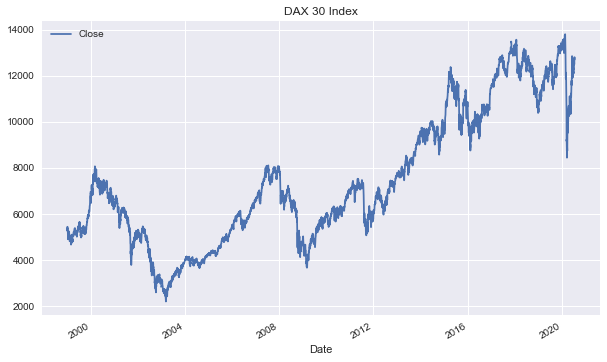

In [7]:
dax.plot(y='Close')
plt.title('DAX 30 Index')
plt.show()

### HDAX

In [3]:
# Read in the data
hdax = pd.read_csv('data/time/wkn_846901_historic.csv', sep=';', decimal=',', thousands='.')
hdax = hdax.rename(columns={'Datum':'Date', 'Schlusskurs':'Close'})[['Date', 'Close']]
hdax.head()

,Date,Close
0,2020-07-16,7087.05
1,2020-07-15,7116.42
2,2020-07-14,6989.13
3,2020-07-13,7054.74
4,2020-07-10,6962.73


In [35]:
hdax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5392 non-null   object 
 1   Close   5392 non-null   float64
dtypes: float64(1), object(1)
memory usage: 84.4+ KB


In [10]:
# Convert the index of the DataFrame to datetime
hdax.Date = pd.to_datetime(hdax.Date)

In [11]:
# Set datetime index
hdax = hdax.set_index('Date')

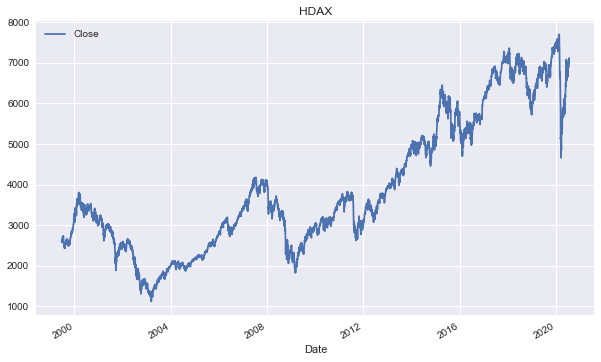

In [38]:
hdax.plot(y='Close')
plt.title('HDAX')
plt.show()

In [19]:
# Merge dataframes
df = dax[['Close']].join(hdax[['Close']], how='inner', lsuffix='_dax', rsuffix='_hdax')

In [20]:
df

,Close_dax,Close_hdax
Date,,
1999-06-22,5468.669922,2633.14
1999-06-23,5399.109863,2602.26
1999-06-24,5327.600098,2570.74
1999-06-25,5301.209961,2575.27
1999-06-28,5356.950195,2583.33
...,...,...
2020-07-08,12494.809570,6901.80
2020-07-09,12489.459961,6893.60
2020-07-10,12633.709961,6962.73


In [21]:
df.columns = ['dax', 'hdax']

In [22]:
df.head()

,dax,hdax
Date,,
1999-06-22,5468.669922,2633.14
1999-06-23,5399.109863,2602.26
1999-06-24,5327.600098,2570.74
1999-06-25,5301.209961,2575.27
1999-06-28,5356.950195,2583.33


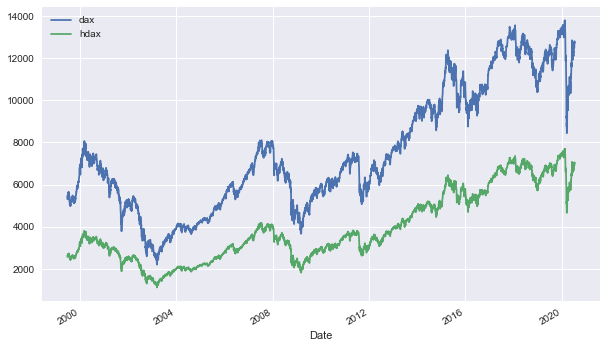

In [49]:
df.plot()

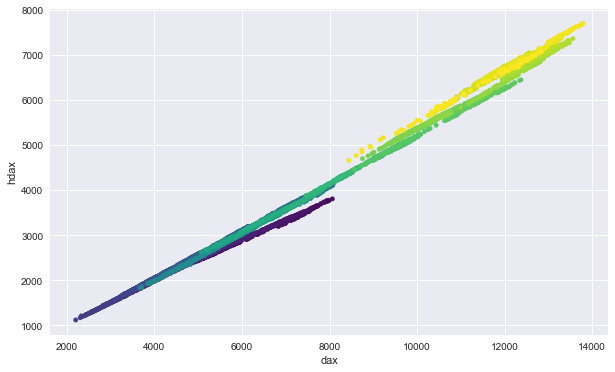

In [50]:
# Scatterplot with one index per axis
df.plot.scatter('dax', 'hdax', c=df.index, 
                cmap=plt.cm.viridis, colorbar=False)
plt.show()

### MSCI World Index

In [4]:
# Read in the data
msci = pd.read_csv('data/time/wkn_969273_historic.csv', sep=';', decimal=',', thousands='.')
msci = msci.rename(columns={'Datum':'Date', 'Schlusskurs':'Close'})[['Date', 'Close']]
msci

,Date,Close
0,2020-07-15,2297.97
1,2020-07-14,2268.13
2,2020-07-13,2252.02
3,2020-07-10,2259.43
4,2020-07-09,2233.78
...,...,...
1127,2016-01-08,1558.00
1128,2016-01-07,1578.00
1129,2016-01-06,1608.00
1130,2016-01-05,1627.00


In [52]:
msci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1132 non-null   object 
 1   Close   1132 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.8+ KB


In [8]:
# Convert the index of the DataFrame to datetime
msci.Date = pd.to_datetime(msci.Date)

In [9]:
# Set datetime index
msci = msci.set_index('Date')

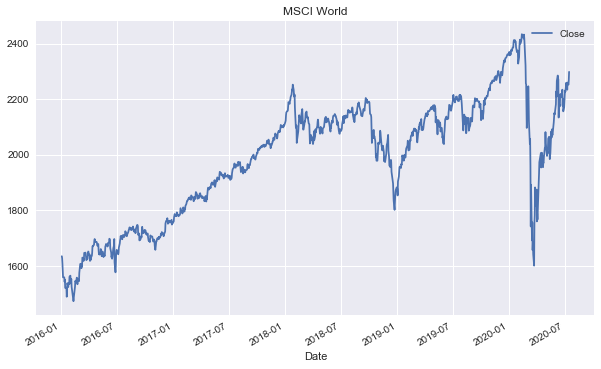

In [58]:
msci.plot(y='Close')
plt.title('MSCI World')
plt.show()

In [23]:
# Merge dataframes
df = df.join(msci[['Close']], how='inner')

In [24]:
df

,dax,hdax,Close
Date,,,
2016-01-04,10283.440430,5513.86,1634.00
2016-01-05,10310.099609,5528.45,1627.00
2016-01-06,10214.019531,5474.22,1608.00
2016-01-07,9979.849609,5349.02,1578.00
2016-01-08,9849.339844,5279.21,1558.00
...,...,...,...
2020-07-08,12494.809570,6901.80,2251.37
2020-07-09,12489.459961,6893.60,2233.78
2020-07-10,12633.709961,6962.73,2259.43


In [25]:
df.columns = ['dax', 'hdax', 'msci']

In [26]:
df.head()

,dax,hdax,msci
Date,,,
2016-01-04,10283.440430,5513.86,1634.0
2016-01-05,10310.099609,5528.45,1627.0
2016-01-06,10214.019531,5474.22,1608.0
2016-01-07,9979.849609,5349.02,1578.0
2016-01-08,9849.339844,5279.21,1558.0


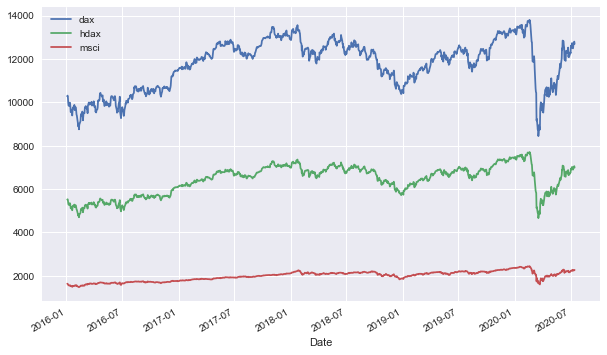

In [63]:
df.plot()

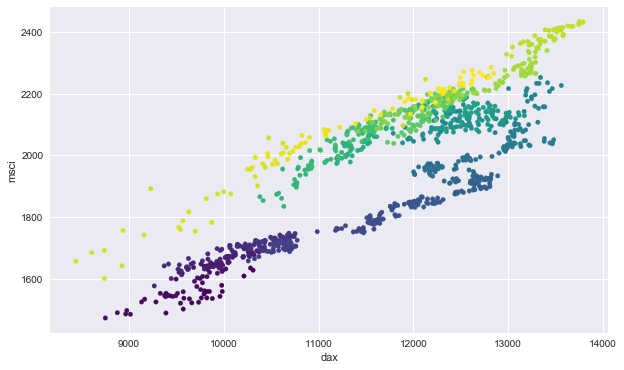

In [66]:
# Scatterplot with one index per axis
df.plot.scatter('dax', 'msci', c=df.index, 
                cmap=plt.cm.viridis, colorbar=False)
plt.show()

## Modeling

In [67]:

# Use stock symbols to extract training data
X = df.drop('msci', axis=1)
y = df.msci

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[0.70850504 0.7608363  0.8396028 ]


When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In [68]:
# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, 
                                                    shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

0.818390561029129


Below chart shows that the predictions clearly deviate from the true time series values.

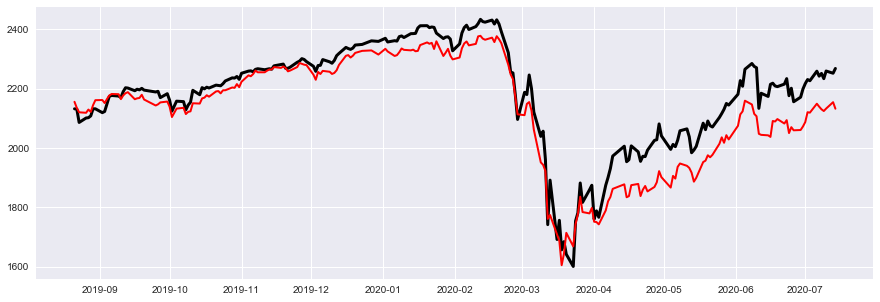

In [76]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(y_test.index, predictions, color='r', lw=2)
plt.show()

## Advanced Predictions

### Imputing missing values

Interpolation: using time to fill in missing data

- A common way to deal with missing data is to interpolate missing values
- With timeseries data, you can use time to assist in interpolation.
- In this case, interpolation means using using the known values on either side of a gap in the data to make assumptions about what's missing.

In [ ]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()
    
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

# Interpolate linearly
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type
                     
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

### Transforming Raw Data

We may define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning, since it's easier to compare one time point to another.

Transforming data to standardize variance

- A common transformation to apply to data is to standardize its mean and variance over time. There are many ways to do this.
- Here, we'll convert dataset so that each point represents the % change over a previous window
- This makes timepoints more comparable to one another if the absolute values of data change a lot

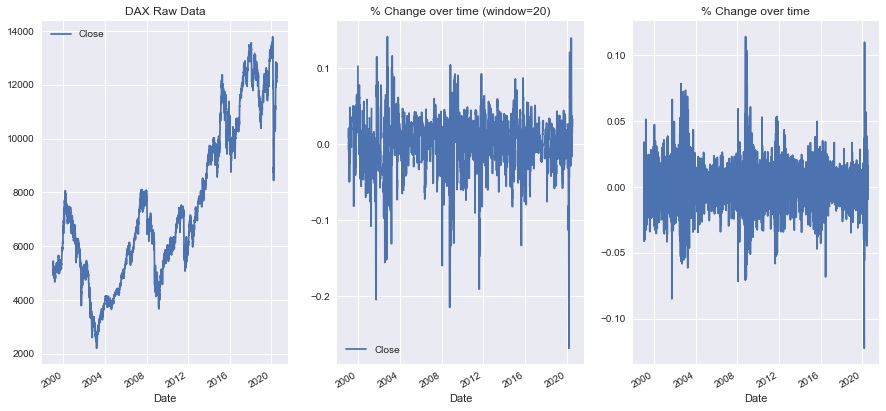

In [78]:
def percent_change(values):
    """Calculates the % change between the last value
    and the mean of previous values"""
    # Separate the last value and all previous values into variables 
    previous_values = values[:-1]
    last_value = values[-1]
    # Calculate the % difference between the last value
    # and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Plot the raw data
fig, axs = plt.subplots(1, 3, figsize=(15, 7)) 
ax = dax.plot(ax=axs[0], title='DAX Raw Data')

# Calculate % change (window) and plot
ax = dax.rolling(window=20).aggregate(percent_change).plot(ax=axs[1], 
                                                           title='% Change over time (window=20)') 
# Calculate % change and plot
ax = dax.pct_change().plot(ax=axs[2], title='% Change over time') 


ax.legend_.set_visible(False)

In [29]:
# Create a new column with percent change
dax['Pct_change'] = dax.Close.pct_change()

In [80]:
# Drop the NaN rows
dax = dax.dropna()

In [82]:
dax.head()

,Close,Pct_change
Date,,
1999-01-05,5263.410156,-0.005094
1999-01-06,5442.899902,0.034101
1999-01-07,5345.709961,-0.017856
1999-01-08,5370.509766,0.004639
1999-01-11,5266.470215,-0.019372


### Handling Outliers

- Outliers are datapoints that are signifcantly statistically different from the dataset.
- They can have negative effects on the predictive power of your model, biasing it away from its "true" value
- One solution is to remove or replace outliers with a more representative value
> Be very careful about doing this - often it is diffcult to determine what is a legitimately extreme value vs an abberation.


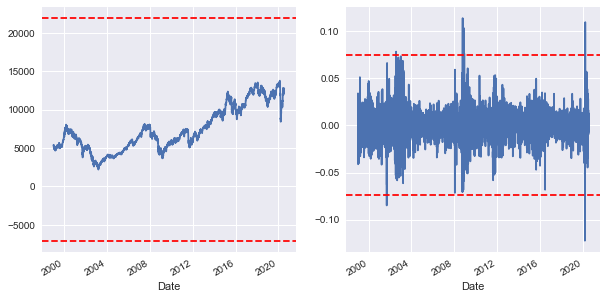

In [84]:
# Plotting a threshold on our data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for data, ax in zip([dax.Close, dax.Pct_change], axs):
    # Calculate the mean / standard deviation for the data
    this_mean = data.mean()
    this_std = data.std()
    # Plot the data, with a window that is 5 standard deviations 
    # around the mean on the row and transformed data
    data.plot(ax=ax)
    ax.axhline(this_mean + this_std * 5, ls='--', c='r') 
    ax.axhline(this_mean - this_std * 5, ls='--', c='r')

Since we've converted the data to percentage change over time, it was easier to spot and correct the outliers. We'll use the output from the percent change over time to detect the outliers. First we will write a function that replaces outlier data points with the `median` value from the entire time series.

In [ ]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 5)
    
    # Replace these values with the median accross the data (take care of nans)
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
dax.Pct_change = dax.Pct_change.apply(replace_outliers)
dax.Pct_change.plot()
plt.show()

## Feature Extraction

#### Engineering multiple rolling features at once

We'll calculate a collection of features for the time series data and visualize what they look like over time. This process resembles how many other time series models operate.

In [85]:
# Calculate a rolling window, then extract two features
dax_rolling = dax.rolling(20).aggregate([np.std, np.max]).dropna() 
dax_rolling.head(3)

Close              Pct_change          
                   std         amax        std      amax
Date                                                    
1999-02-01  151.030874  5442.899902   0.019639  0.034101
1999-02-02  148.302247  5442.899902   0.019862  0.034101
1999-02-03  129.248044  5370.509766   0.018283  0.031498

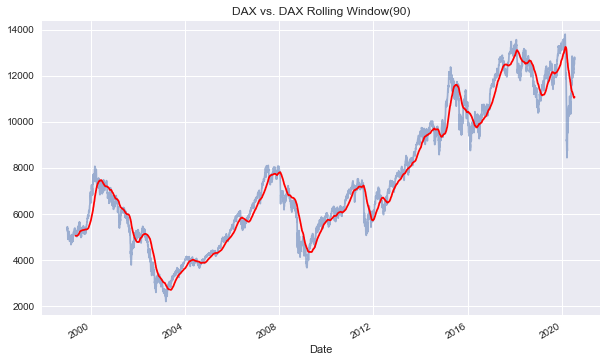

In [105]:
dax.Close.plot(alpha=.5)
dax.rolling(90).Close.mean().plot(c='r')
plt.title('DAX vs. DAX Rolling Window(90)')
plt.show()

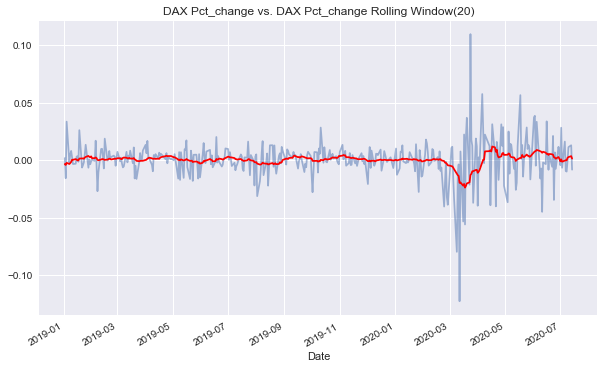

In [120]:
dax.Pct_change.loc["2019-01":].plot(alpha=.5)
dax.rolling(20).Pct_change.mean().loc["2019-01":].plot(c='r')
plt.title('DAX Pct_change vs. DAX Pct_change Rolling Window(20)')
plt.show()

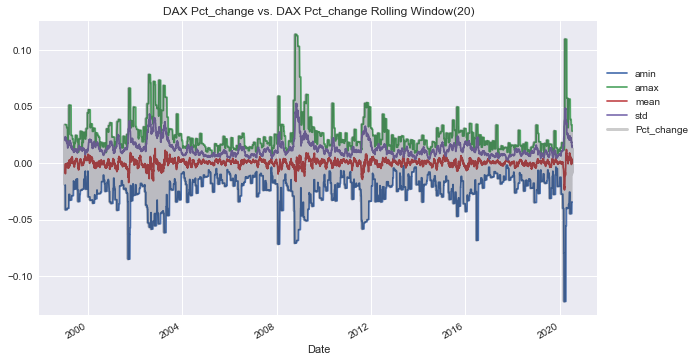

In [117]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
dax_perc_rolling = dax.Pct_change.rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = dax_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.plot()
dax.Pct_change.plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.title('DAX Pct_change vs. DAX Pct_change Rolling Window(20)')
plt.show()

### Percentiles and partial functions

We can pre-choose arguments of a function to pre-configure how it runs. We'll use the `partial()` function to create several _feature generators_ that calculate percentiles of your data using a list comprehension. 

We'll use this to calculate several percentiles of the data using the `percentile()` function in numpy.

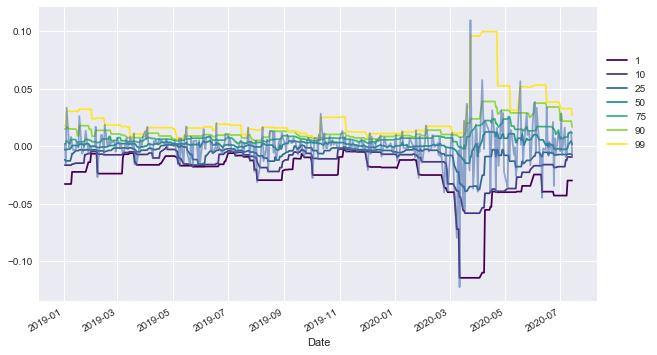

In [124]:
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
dax_perc_rolling = dax.Pct_change.rolling(20, min_periods=5, closed='right')
features_percentiles = dax_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc["2019-01":].plot(cmap=plt.cm.viridis)
dax.Pct_change.loc["2019-01":].plot(alpha=.6)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

### Using "date" information

It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In this exercise, you'll extract these date/time based features. A single time series has been loaded in a variable called prices.

In [126]:
# Extract date features from the data, add them as columns
dax['day_of_week'] = dax.index.dayofweek
dax['week_of_year'] = dax.index.weekofyear
dax['month_of_year'] = dax.index.month

# Print prices_perc
dax

,Close,Pct_change,day_of_week,week_of_year,month_of_year
Date,,,,,
1999-01-05,5263.410156,-0.005094,1,1,1
1999-01-06,5442.899902,0.034101,2,1,1
1999-01-07,5345.709961,-0.017856,3,1,1
1999-01-08,5370.509766,0.004639,4,1,1
1999-01-11,5266.470215,-0.019372,0,2,1
...,...,...,...,...,...
2020-07-08,12494.809570,-0.009669,2,28,7
2020-07-09,12489.459961,-0.000428,3,28,7
2020-07-10,12633.709961,0.011550,4,28,7


## Validation Models

### Smoothness and Auto-correlation

- A common question to ask of a timeseries: how smooth is the data.
- AKA, how correlated is a timepoint with its neighboring timepoints (called autocorrelation).  
- The amount of auto-correlation in data will impact your models

> The regression models will assign a "weight" to each input feature, and we can use these weights to determine how smooth or autocorrelated the data is. 

In [ ]:
## Creating a time-shifted DataFrame

# data is a pandas Series containing time series data
data = pd.Series(...)
# Shifts
shifts = [0, 1, 2, 3, 4, 5, 6, 7]
# Create a dictionary of time-shifted data
many_shifts = {'lag_{}'.format(ii): data.shift(ii) for ii in shifts}
# Convert them into a dataframe
many_shifts = pd.DataFrame(many_shifts)  

### Creating time-shifted features

In machine learning for time series, it's common to use information about previous time points to predict a subsequent time point.

We'll first `shift` the raw data and visualize the results. We'll use the percent change time series that we calculated above, this time with a very short window. **A short window is important because, in a real-world scenario, we want to predict the day-to-day fluctuations of a time series, not its change over a longer window of time.**

In [32]:
# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

dax_perc = dax.Pct_change.loc['2019':]

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): dax_perc.shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
dax_perc_shifted = pd.DataFrame(shifted_data)

dax_perc_shifted.head()

,lag_1_day,lag_2_day,lag_3_day,lag_4_day,lag_5_day,lag_6_day,lag_7_day,lag_8_day,lag_9_day,lag_10_day
Date,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.002011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,-0.015456,0.002011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,0.033699,-0.015456,0.002011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,-0.001846,0.033699,-0.015456,0.002011,NaN,NaN,NaN,NaN,NaN,NaN


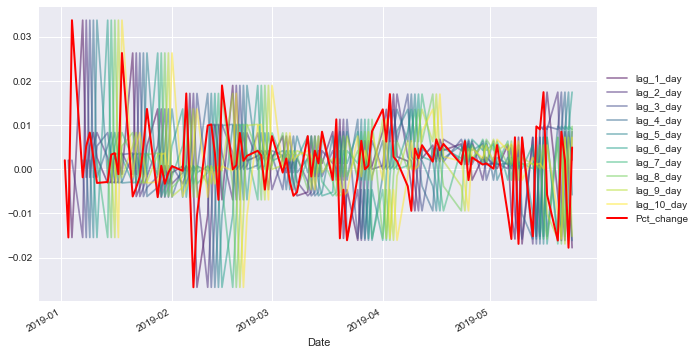

In [31]:
# Plot the first 100 samples of each
ax = dax_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis, alpha=.5)
dax_perc.iloc[:100].plot(color='r', lw=2)
ax.legend(loc=(1.01, .25))
plt.show()

### Special case: Auto-regressive models

Now that we've created time-shifted versions of a single time series, we can fit an auto-regressive model. This is a regression model where the input features are time-shifted versions of the output time series data. We are using previous values of a timeseries to predict current values of the same timeseries (thus, it is auto-regressive).

By investigating the coefficients of this model, we can explore any repetitive patterns that exist in a timeseries, and get an idea for how far in the past a data point is predictive of the future.

_Note: We need to fill in the missing values with the median so that it behaves well with scikit-learn._

In [35]:
# Replace missing values with the median for each column
X = dax_perc_shifted.fillna(np.nanmedian(dax_perc_shifted))
y = dax_perc.fillna(np.nanmedian(dax_perc))

# Fit the model
model = Ridge()
model.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Why Ridge: Ridge regression spreads out weights accross features (if applicaple) rather than assign it all to a single feature.

In [36]:
# # Visualize the fit model coefficients
# fig, ax = plt.subplots()
# ax.bar(many_shifts.columns, model.coef_) 
# ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

# # Set formatting so it looks nice
# plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


### Visualize regression coefficients 
(Visualizing coeffcients for a smooth signal)

Now that we've fit the model, let's visualize its coefficients. This is an important part of machine learning because it gives an idea for how the different features of a model affect the outcome.

Now, we'll create a function that, given a set of coefficients and feature names, visualizes the coefficient values.

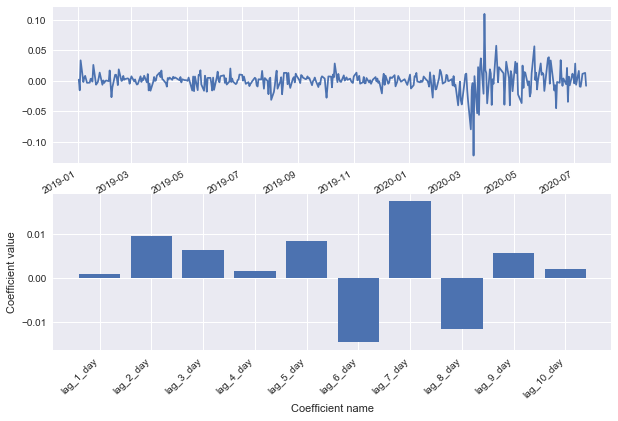

In [37]:
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
y.plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, dax_perc_shifted.columns, ax=axs[1])
plt.show()

### Interpreting the auto-regressive model coeffcients

Larger absolute values of coefficients mean that a given feature has a large impact on the output variable.

> When we use time-lagged features on the raw data, we see that the highest coefficient is usually the first one (not in this example though). This means that the N-1th time point is useful in predicting the Nth timepoint, but no other points are useful.

### Auto-regression with a smoother time series
(Visualizing coeffcients for a smooth signal)

Now, let's re-run the same procedure using a smoother signal. We'll use the same percent change algorithm as before, but this time a much larger window (40 instead of 20). As the window grows, the difference between neighboring timepoints gets smaller, resulting in a smoother signal. What will this do to the auto-regressive model?

In [45]:
dax_perc = dax.Pct_change.loc['2019':]

# Define a rolling window with Pandas, excluding the right-most datapoint of the window
dax_perc_rolling = dax_perc.rolling(5, min_periods=5, closed='right').mean()

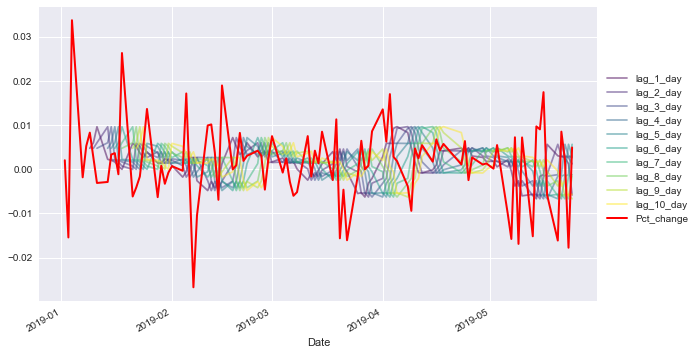

In [46]:
# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): dax_perc_rolling.shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
dax_perc_shifted = pd.DataFrame(shifted_data)

# Plot the first 100 samples of each
ax = dax_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis, alpha=.5)
dax_perc.iloc[:100].plot(color='r', lw=2)
ax.legend(loc=(1.01, .25))
plt.show()

In [47]:
# Replace missing values with the median for each column
X = dax_perc_shifted.fillna(np.nanmedian(dax_perc_shifted))
y = dax_perc.fillna(np.nanmedian(dax_perc))

# Fit the model
model = Ridge()
model.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

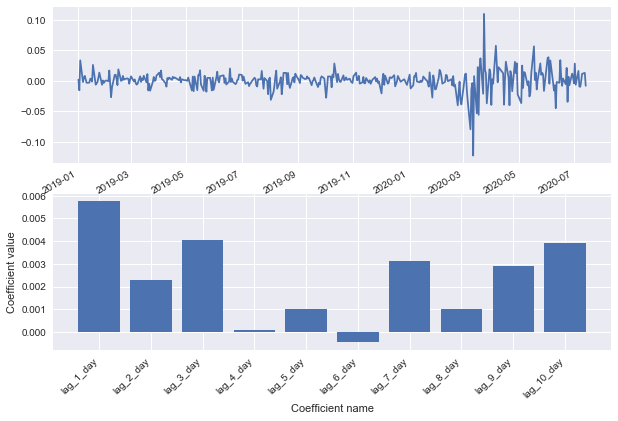

In [48]:
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
y.plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, dax_perc_shifted.columns, ax=axs[1])
plt.show()

> By transforming your data with a larger window, you've also changed the relationship between each timepoint and the ones that come just before it. This model's coefficients gradually go down to zero, which means that the signal itself is smoother over time. Be careful when you see something like this, as it means your data is not i.i.d. (This behaviour is not seen in this example)

### Cross validation

Using the time series CV iterator

- Thus far, we've broken the linear passage of time in the cross validation
- However, one generally should not use datapoints in the future to predict data in the past 
- One approach: Always use training data from the past to predict the future

Time-based cross-validation

Let's visualize the behavior of the time series cross-validation iterator in scikit-learn. Use this object to iterate through your data one last time, visualizing the training data used to fit the model on each iteration.

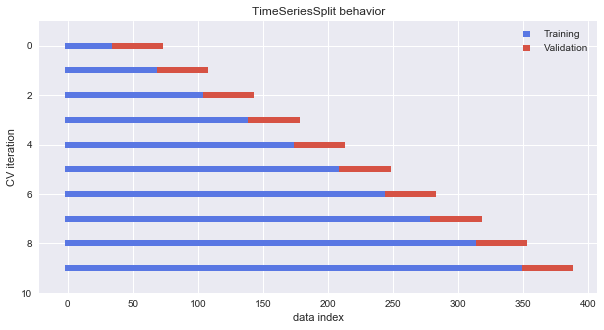

In [50]:
# Import and initialize the cross-validation iterator
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(n_splits=10)

fig, ax = plt.subplots(figsize=(10, 5))

for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot training and test indices    
    l1 = ax.scatter(tr, [ii] * len(tr), 
                    c=[plt.cm.coolwarm(.1)],                     
                    marker='_', lw=6)    
    l2 = ax.scatter(tt, [ii] * len(tt), c=[plt.cm.coolwarm(.9)],
                    marker='_', lw=6)    
    ax.set(ylim=[10, -1], 
           title='TimeSeriesSplit behavior',            
           xlabel='data index', ylabel='CV iteration')    
    ax.legend([l1, l2], ['Training', 'Validation'])

Note that the size of the training set grows each time when we use the time series cross-validation object. This way, the time points predicted are always after the timepoints we train on.

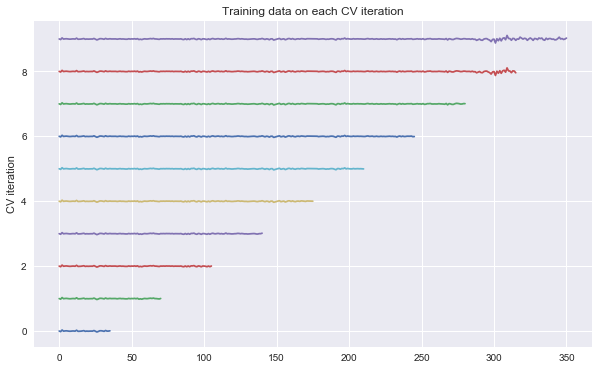

In [49]:
# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(10)

# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y[tr])

ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
plt.show()

In [ ]:
## Custom scoring functions in scikit-learn
def myfunction(estimator, X, y):
    y_pred = estimator.predict(X)
    my_custom_score = my_custom_function(y_pred, y) 
    return my_custom_score

In [ ]:
## A custom correlation function for scikit-learn
def my_pearsonr(est, X, y):
    # Generate predictions and convert to a vector 
    y_pred = est.predict(X).squeeze()
    # Use the numpy "corrcoef" function to calculate a correlation matrix
    my_corrcoef_matrix = np.corrcoef(y_pred, y.squeeze())
    # Return a single correlation value from the matrix
    my_corrcoef = my_corrcoef[1, 0] 
    return my_corrcoef

## Stationarity and stability

Stationarity
Stationary time series do not change their statistical properties over time E.g., mean, standard deviation, trends
Most time series are non-stationary to some extent

Model stability
Non-stationary data results in variability in our model
The statistical properties the model  nds may change with the data
In addition, we will be less certain about the correct values of model parameters How can we quantify this?

Cross validation to quantify parameter stability
- One approach: use cross-validation 
- Calculate model parameters on each iteration 
- Assess parameter stability across all CV splits

Bootstrapping the mean
Bootstrapping is a common way to assess variability The bootstrap:
1. Takearandomsampleofdatawithreplacement
2. Calculatethemeanofthesample
3. Repeatthisprocessmanytimes(1000s)
4. Calculatethepercentilesoftheresult(usually2.5,97.5)
The result is a 95% con dence interval of the mean of each coef cient.

In [ ]:
### Bootstrapping the mean

from sklearn.utils import resample
# cv_coefficients has shape (n_cv_folds, n_coefficients)
n_boots = 100
bootstrap_means = np.zeros(n_boots, n_coefficients) 
for ii in range(n_boots):
    # Generate random indices for our data with replacement, 
    # then take the sample mean
    random_sample = resample(cv_coefficients) 
    bootstrap_means[ii] = random_sample.mean(axis=0)
    
# Compute the percentiles of choice for the bootstrapped means
percentiles = np.percentile(bootstrap_means, (2.5, 97.5), axis=0)

### Plotting the bootstrapped coef cients
fig, ax = plt.subplots()
ax.scatter(many_shifts.columns, percentiles[0], marker='_', s=200) 
ax.scatter(many_shifts.columns, percentiles[1], marker='_', s=200)
  

Bootstrapping a confidence interval (variability in data)

A useful tool for assessing the variability of some data is the bootstrap. In this exercise, you'll write your own bootstrapping function that can be used to return a bootstrapped confidence interval.

This function takes three parameters: a 2-D array of numbers (data), a list of percentiles to calculate (percentiles), and the number of boostrap iterations to use (n_boots). It uses the resample function to generate a bootstrap sample, and then repeats this many times to calculate the confidence interval.

In [ ]:
from sklearn.utils import resample

def bootstrap_interval(data, percentiles=(2.5, 97.5), n_boots=100):
    """Bootstrap a confidence interval for the mean of columns of a 2-D dataset."""
    # Create our empty array to fill the results
    bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    for ii in range(n_boots):
        # Generate random indices for our data *with* replacement, then take the sample mean
        random_sample = resample(data)
        bootstrap_means[ii] = random_sample.mean(axis=0)
        
    # Compute the percentiles of choice for the bootstrapped means
    percentiles = np.percentile(bootstrap_means, percentiles, axis=0)
    return percentiles

Calculating variability in model coefficients

In this lesson, you'll re-run the cross-validation routine used before, but this time paying attention to the model's stability over time. You'll investigate the coefficients of the model, as well as the uncertainty in its predictions.

Begin by assessing the stability (or uncertainty) of a model's coefficients across multiple CV splits. Remember, the coefficients are a reflection of the pattern that your model has found in the data.

An instance of the Linear regression object (model) is available in your workpsace. Also, the arrays X and y (the data) are available too.

In [ ]:
# Iterate through CV splits
n_splits = 100
cv = TimeSeriesSplit(n_splits=n_splits)

# Create empty array to collect coefficients
coefficients = np.zeros([n_splits, X.shape[1]])

for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Fit the model on training data and collect the coefficients
    model.fit(X[tr], y[tr])
    coefficients[ii] = model.coef_

In [ ]:
# Calculate a confidence interval around each coefficient
bootstrapped_interval = bootstrap_interval(coefficients)

# Plot it
fig, ax = plt.subplots()
ax.scatter(feature_names, bootstrapped_interval[0], marker='_', lw=3)
ax.scatter(feature_names, bootstrapped_interval[1], marker='_', lw=3)
ax.set(title='95% confidence interval for model coefficients')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

You've calculated the variability around each coefficient, which helps assess which coefficients are more stable over time!

Visualizing model score variability over time

Now that you've assessed the variability of each coefficient, let's do the same for the performance (scores) of the model. Recall that the TimeSeriesSplit object will use successively-later indices for each test set. This means that you can treat the scores of your validation as a time series. You can visualize this over time in order to see how the model's performance changes over time.

An instance of the Linear regression model object is stored in model, a cross-validation object in cv, and data in X and y.

In [ ]:
from sklearn.model_selection import cross_val_score

# Generate scores for each split to see how the model performs over time
scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)

# Convert to a Pandas Series object
scores_series = pd.Series(scores, index=times_scores, name='score')

# Bootstrap a rolling confidence interval for the mean score
scores_lo = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=2.5))
scores_hi = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=97.5))


# Plot the results
fig, ax = plt.subplots()
scores_lo.plot(ax=ax, label="Lower confidence interval")
scores_hi.plot(ax=ax, label="Upper confidence interval")
ax.legend()
plt.show()

You plotted a rolling confidence interval for scores over time. This is useful in seeing when your model predictions are correct.

Assessing model performance stability
- If using the TimeSeriesSplit, can plot the model's score over time. 
- This is useful in  nding certain regions of time that hurt the score 
- Also useful to  nd non-stationary signals

In [ ]:
def my_corrcoef(est, X, y):
    """Return the correlation coefficient
    between model predictions and a validation set.""" 
    return np.corrcoef(y, est.predict(X))[1, 0]

# Grab the date of the first index of each validation set
first_indices = [data.index[tt[0]] for tr, tt in cv.split(X, y)]
# Calculate the CV scores and convert to a Pandas Series
cv_scores = cross_val_score(model, X, y, cv=cv, scoring=my_corrcoef) 
cv_scores = pd.Series(cv_scores, index=first_indices)

Accounting for non-stationarity

In this exercise, you will again visualize the variations in model scores, but now for data that changes its statistics over time.

An instance of the Linear regression model object is stored in model, a cross-validation object in cv, and the data in X and y.

In [ ]:
# Pre-initialize window sizes
window_sizes = [25, 50, 75, 100]

# Create an empty DataFrame to collect the stores
all_scores = pd.DataFrame(index=times_scores)

# Generate scores for each split to see how the model performs over time
for window in window_sizes:
    # Create cross-validation object using a limited lookback window
    cv = TimeSeriesSplit(n_splits=100, max_train_size=window)
    
    # Calculate scores across all CV splits and collect them in a DataFrame
    this_scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)
    all_scores['Length {}'.format(window)] = this_scores
    
# Visualize the scores
ax = all_scores.rolling(10).mean().plot(cmap=plt.cm.coolwarm)
ax.set(title='Scores for multiple windows', ylabel='Correlation (r)')
plt.show()

notice how in some stretches of time, longer windows perform worse than shorter ones. This is because the statistics in the data have changed, and the longer window is now using outdated information.